
##Домашнее задание 4: kNN. Линейные модели. Работа с признаками

#Что такое ML (обучение с учителем)

Берем датасет (выборку) в котором все элементы представлены числовыми векторами или могут быть такими представлены после векторизации. Далее словарь:
* *Объект* (*observation*, *datum*, *data point*, *sample*) - это строчка нашего датасета;
* У каждого объекта есть *имя* (*name*) или *индекс*;
* Объект имеет набор *признаков* (*features*), которые являются векторами или чем-то иным. Например, имя тоже является признаком;
* Для каждого объекта имеется *предсказание* (*target*): они выражают информацию, которую мы хотим научиться *предсказывать для новых объектов*;
* *Предсказание* (*prediction*) - значение, которые мы "предсказываем" для каждого объекта с помощью некоторого алгоритма, который выбирается из некоторой *модели* (*model*).

# Математическая постановка задачи обучения с учителем

Пусть задано множество всех объектов $X$ и множество всех предсказаний $Y$. Пусть задана функция предсказания (или *целевая функция*, *target fuction*) $y^{*} \colon X \to Y$, которая каждому объекту $x\in X$ ставит в соответствие "правильный" ответ $y\in Y$. Нам известны только конечное число значений этой функции. Точнее, если $\{x_{1},\dots, x_{n} \}\subset X$ - конечное подмножество, то известны значения $y_{i}=y^{*}(x_{i})$. Пары вида $(x_{i},y_{i})$ называются *прецедентами*. Совокупность прецендентов $X^{n}=\{(x_{1},y_{1}),\dots, (x_{n},y_{n})\}$ называется *обучающей выборкой*.

**Задача**: "восстановить" $y^{*}$ по конечной выборке $X^{n}$. "Восстановить" означает найти (построить) такую функцию (*decision
function*) $\alpha \colon X \to Y$ для которой разница между $\alpha(x)$ и $y^{*}(x)$ минимальна на $x\in X$ в совокупности. Функция $\alpha$ часто называется *алгоритмом*, потому что требуется точная компьютерная реализация этой функции.

* $Y=\mathbb{R}$ - задача *регрессии* (*regression estimation*)
* $Y=\{C_{1},\dots, C_{m}\}$ - задача *классификации* (*classification*)

Остальные попозже ... Пока этого хватит

*Признак* - это некоторое отображение $f\colon X\to D_{f}$, которое каждому объекту $x\in X$ ставит в соответствие его характеристику $f(x)$.  

* $D_{f}=\mathbb{R}$: $f$ - *количественный признак*;
* $D_{f} = \{0,1\}$: $f$ - *бинарный признак*.

Пусть $f_{1},\dots, f_{n}$ - набор признаков. Вектор $(f_{1}(x),\dots, f_{n}(x))$ называется *признаковым описанием объекта $x\in X$*. На практике объекты $X$ отождествляются с множеством всех (конечных) признаковых описаний объектов $D_{f_{1}}\times \dots \times D_{f_{n}}$.

Как ищут алгоритм $\alpha$? Чтобы была математика, мы ограничиваемся так называемой *моделью алгоритмов* (*model*), которая представляет из себя *параметрическое семейство алгоритмов* $A=\{g(x,\theta)\text{ | } \theta \in \Theta \}$, где $g\colon X\times \Theta \to Y$. Семейство параметров $\Theta$ называется *пространством параметров* (*search space*). Итак, то есть $\alpha(x) \in A$ - *гипотеза*.

Пусть, например, у нас $X$ задается $n$ числовыми признаками $f_{j}\colon X\to \mathbb{R}$ и имеет ровно $n$ числовых параметров $\Theta = \{(\theta_{1},\dots, \theta_{n}) = \mathbb{R}^{n}$.

Выделяют *линейные модели* $g(x,\theta) = \sum^{n}_{i=1}\theta_{j}f_{j}(x)$ для задач регрессии, т.е. $Y=\mathbb{R}$, и $g(x,\theta) = \mathrm{sign} \sum^{n}_{i=1}\theta_{j}f_{j}(x)$ для задач классификации $Y=\{-1,1\}$.

***Обучение*** (*training, learning*) *алгоритма $a(x)\in A$ параметрической модели $A$* - процесс подбора "оптимального" параметра $\theta \in \Theta$ по обучающей выборке $X^{k}$.

Пусть $(X\times Y)^{k}$ означает множество всех конечных выборок (т.е. всех конечных наборов пар $(x_{i},y_{i})\in X\times Y$). Метод подбора нужного параметра называется *методом обучения* (*learning algorithm*) и с математической точки зрения означает функцию $$\mu\colon (X\times Y)^{k} \to A.$$

*Функция потерь* (*loss function*) - это неотрицательная функция $\mathcal{L}(a,x)$, которая характеризует величину ошибки алгоритма $a\in A$ на объекте $x\in X$. Ее мы берем сами как и выбираем модель - они называются *гиперпараметрами*.

Примеры: если $Y\subseteq \mathbb{R}$, то часто берут $\mathcal{L}(a,x)=(a(x)-y^{*}(x))^{2}$ - *квадратичная функция потерь*, $\mathcal{L}(a,x)=|a(x)-y^{*}(x)|$ - *стандартное отклонение* для регресии и $\mathcal{L}(a,x)=[a(x)\ne y^{*}(x)]$ - *индикатор ошибки* для классификации.

Функция потерь замеряет ошибку только по конкретному $x\in X$, а *функционал качества* дает взвешанную информацию об ошибке на конечной выборке $X^{k}$:
$$Q(a,X^{k})=\frac{1}{k} \sum^{k}_{i=1}\mathcal{L}(a,x_{i}).$$

Если $\mathcal{L}(a,x)=(a(x)-y^{*}(x))^{2}$, то обозначают $$\mathrm{MSE}(a,X^{k}) = Q(a,X^{k})=\frac{1}{k}\sum^{k}_{i=1}(a(x_{i})-y_{i})^{2};$$
$$\mathrm{MAE}(a,X^{k}) = Q(a,X^{k})=\frac{1}{k}\sum^{k}_{i=1}|a(x_{i})-y_{i}|.$$

MSE = Mean Squared Error, MAE = Mean Absolute Error.

Теперь мы готовы совсем уточнить исходную задачу. Классический метод обучения $\mu$ (но далеко не единственный), называемый *минимизацией эмпирического риска* (*empirical risk minimization, ERM*), заключается в том, чтобы среди всех $a(x)\in A$ найти такой, что на обучающей выборке $X^{k}$ он доставляет минимальное отклонение по заранее выбранному функционалу качества $Q(a,X^{k})$:
$$\mu(X^{k}):=\mathrm{arg}\, \mathrm{min}_{a\in A}Q(a,X^{k}).$$

Например, если мы решаем задачу регрессии (т.е. $Y=\mathbb{R}$) с $n$ числовыми признаками, то выбрав $Q(a,X^{k})=\mathrm{MSE}(a,X^{k})$, метод обучения минимизацией эмпирического риска пишется так:
$$\mu(X^{k}) = \mathrm{arg}\, \mathrm{min}_{\theta \in \Theta}\frac{1}{k}\sum^{k}_{i=1}(g(x_{i},\theta)-y_{i})^{2} = \mathrm{arg}\, \mathrm{min}_{\theta \in \Theta}\sum^{k}_{i=1}(g(x_{i},\theta)-y_{i})^{2}.$$



---



# Алгоритм: классификатор kNN (k-nearest neighbors)

Ставим перед собой задачу классификации, т.е. $Y=\{1,\dots, C\}$.

kNN - *метрический непараметрический метод обучения*. Смысл метрических методов очень хорошо раскрывает фраза «Скажи мне, кто твой друг, и я скажу, кто ты». Алгоритмы этого класса почти не имеют фазы обучения. Вместо этого они просто запоминают всю обучающую выборку, а на этапе предсказания просто ищут объекты, похожие на целевой.

Такой процесс называют *lazy learning*, потому что никакого обучения, по сути, не происходит. Также метрические модели являются непараметрическими, потому что они не делают явных допущений о глобальных законах, которым подчиняются данные. Так, линейная регрессия основывается на предположении о том, что изучаемая закономерность линейная (с неизвестными коэффициентами, которые восстанавливаются по выборке), а линейная бинарная классификация — что существует гиперплоскость, неплохо разделяющая классы. Метрические методы же локальны: они исходят из допущения, что свойства объекта можно узнать, имея представление о его соседях.

Пусть дана (симметрическая) функция расстояния $\rho \colon X\times X \to [0,\infty)$ и пусть дана обучающая выборка $X^{N}=(x_{i},y_{i})^{N}_{i=1}$. Зафиксируем натуральное число $k$.

Предположим, что требуется классифицировать новый объект $u\in X$. Для этого найдём $k$ наиболее близких к $u$ в смысле расстояния $\rho$ объектов обучающей выборки $X_{k}(u)=\{x^{1}_{u},\dots, x^{k}_{u}\}\subseteq X^{N}$: то есть
$$\forall x_{\mathrm{in}} \in X_{k}(u)\,\forall x_{\mathrm{out}}\in X^{N}\backslash X_{k}(u)\quad \rho(u,x_{\mathrm{in}})\le \rho(u,x_{\mathrm{out}}).$$


Пусть объектам $x^{i}_{u}$ мы поставили метки $y^{i}_{u}$. Тогда вот формула для алгоритма kNN:
$$a(u):=\mathrm{argmax}_{y\in Y} \sum^{k}_{i=1}I[y^{i}_{u}=y],$$
где $I[y^{i}_{u}=y]$ - *индикатор* (не вероятностный) условия $[y^{i}_{u}=y]$.

Т.е. сначала мы берем обучающую выборку $X^{N}$, потом для нового $u\in X$ определяем $k$ параметров $x^{i}_{u}$, отдаленных от $u$ на самые маленькие расстояния (берем топ $k$). Наконец, среди этого топа $k$ мы смотрим какой $y\in Y$ встречается чаще всего: его и выбираем.  

Если объекты являются точками $\mathbb{R}^{d}$, то мы можем выделить области точек, которые обладают признаком $y\in Y$. Обычно признак $y$ представляется определенным цветом. Границы этих областей называются *решающими поверхностями*. В случае $d\le 3$ мы можем их визуализировать.

# Задачи по kNN

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [249]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


In [250]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [251]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

Как мы видим, Nan у нас нет. Значит и удалять ничего не нужно.

*Категориальные признаки (переменные)* - такие признаки в датасете, которые не являются точкой в некотором $\mathbb{R}^{d}$.

По описанию видим, что у нас все float. Поэтому кодировать их в точки $\mathbb{R}^{d}$ не придется.  



---



Все же приведем пример, когда это все таки было бы нужно.

In [252]:
from sklearn.preprocessing import OneHotEncoder

In [253]:
roles = np.array([('Tom', 'manager'),
                   ('Mary', 'developer'),
                   ('Ann', 'recruiter'),
                   ('Jim', 'developer')])

In [254]:
roles

array([['Tom', 'manager'],
       ['Mary', 'developer'],
       ['Ann', 'recruiter'],
       ['Jim', 'developer']], dtype='<U9')

In [255]:
encoder = OneHotEncoder()

In [256]:
roles[:, 1]

array(['manager', 'developer', 'recruiter', 'developer'], dtype='<U9')

In [257]:
roles[:, [1]]

array([['manager'],
       ['developer'],
       ['recruiter'],
       ['developer']], dtype='<U9')

*estimator* (*оценщик*) = *классификатор* - терминалогия sklearn.

Метод `fit` указывается в каждом *оценщике* (*estimator*). Обычно он берет объекты (samples) `X`, таргеты `y` если речь об обучении с учителем, и потенциально другие *sample properties* such as *sample_weight*.

In [258]:
encoded_roles = encoder.fit_transform(roles[:, [1]])



---



**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

Сначала импортируем эту функцию из пакета `sklearn`.

In [259]:
from sklearn.model_selection import train_test_split

Краткий обор функции `train_test_split()`:
* первыми аргументами идут массивы - **arrays**;
* вторым аргументом идет *размер тестовой выборки* - **test_size**: ее нам наказали взять 0.3, что означает долю тестовой выборки ко всей выборки;
* третий аргумент аналогичен второму, но представляет *размер обучающей выборки* - **train_size**;
* четвертый аргумент устанавливает *состояние случайности* отбора тестовой и обучающей выборок - **random_state**. Подается в виде натурального числа - порядкого номера случайного генератора. Или default - numpy.random(). Или в виде случайного генератора numpy. Тогда нужно передать саму функцию.
* **shuffle** - тасовка. Следует ли перетасовывать данные перед разделением или нет? Принимает значение bool;
* **stratify** - расслаивать. Передается массив длины такой же, что и длины таргета у которого в каждое значение встречается хотя бы 2 раза (полезно для задач классификации). Если передано не None, то данные разбиваются стратифицированным образом, используя массив в качестве меток классов. То есть в разделениях будут сохрянятся количественные соотношения на классы.


На выход дает 4 списка в порядке `X_train, X_test, y_train, y_test`.

In [260]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=np.random.seed(), stratify = y)

In [261]:
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
156,13.84,4.12,2.38,19.5,89.0,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480.0
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0
140,12.93,2.81,2.70,21.0,96.0,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600.0
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,13.11,1.90,2.75,25.5,116.0,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
101,12.60,1.34,1.90,18.5,88.0,1.45,1.36,0.29,1.35,2.45,1.04,2.77,562.0
37,13.05,1.65,2.55,18.0,98.0,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105.0


**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [262]:
from sklearn.neighbors import KNeighborsClassifier #импортируем класс KNeighborsClassifier
from sklearn.preprocessing import StandardScaler #импортируем модуль StandardScaler для нормализации данных
from sklearn.metrics import accuracy_score #импортируем функцию, считающую оценку точности предсказания в виде доли правильных ответов к размеру тестовой выборки

Краткий обзор класса `KNeighborsClassifier`. При инициализации объекта передаются параметры:
* первым аргументом передается натуральное число $k$ - *количество соседей* (**n_neighbors**);
* вторым аргументом передаются веса (**weights**). Если ничего не передавать, то будут одинаковые веса - классический kNN;
* третьим аргументом передаем **algorithm** - алгоритм для нахождения $k$ ближайших соседей: `‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’`. Авто - самый хитрый :) Он попытается выбрать наиболее подходящий алгоритм на основе значений, переданных в fit method (метод обучения);
* **leaf_size**. Следующий аргумент - натуральное число - размер *листа дерева* (**leaf_size**). Это дополнительный параметр для алгоритма BallTree и KDTree;
* **p**. Параметр $p$ для метрики Минковского;
* **metric**. Название (в формате `str`) метрики. По умолчанию - метрика Минковского.
* **n_jobs** - количество параллельных процессов для поиска соседей. По умолчанию 1;



По итогу создался *объект класс*. Теперь можно использовать *методы класса*. Напомним, что объект создается с помощью специального метода `__init__()`, который есть в каждом классе. У каждого объекта класса есть *атрибуты*, которые передаются в методе `__init__` при инициализации. Так же у класса есть набор методов и функций. Напомним, что один из аргументов всегда `self`

Атрибуты класса `KNeighborsClassifier`, которые появляются **после применения метода** `fit` - обучения:
* **classes_ : array of shape (n_classes,)** - класс меток видных классификатору;
* **effective_metric_ : str or callble** - функция расстояния. Будет совпадать с параметром класса;
* **effective_metric_params_ : dict** - параметры для метрики;
* **n_features_in_ : int** - число фичей, видных в ходе обучения;
* **feature_names_in_ : ndarray of shape `(n_features_in_,)`** - имена фичей видных в ходе обучения;
* **n_samples_fit_ : int** - число объектов (samples) в обучающей выборке;
* **outputs_2d_ : bool** - False если y’s shape is (n_samples, ) or (n_samples, 1) в ходе обучения в остальных случаях True.

Проверим это:

Теперь инициализуем объект класса:

In [263]:
kNN_1 = KNeighborsClassifier(n_neighbors=1, p=2)

Вот список всех атрибутов объекта `kNN_1`, включая методы и встроенные атрибуты:

In [264]:
#dir(kNN_1)

Убедимся, что весов нет

In [265]:
kNN_1.weights

'uniform'

Сколько соседей:

In [266]:
kNN_1.n_neighbors

1

Какой алгоритм:

In [267]:
kNN_1.algorithm

'auto'

Метод `fit(X,y)` обучает классификатор на выборке. Возвращает обученный классификатор kNN.

Нас попросили обучать только по столбцам `alcohol, magnesium`.

In [268]:
X1_test, X1_train= X_test[['alcohol', 'magnesium']], X_train[['alcohol', 'magnesium']]

Обучаем на обучающей выборке `X1_train`.

In [269]:
kNN_1.fit(X1_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Смотрим на `dir`:

In [270]:
#dir(kNN_1)

Добавились новые атрибуты. Например, теперь появился атрибут `classes_`, `n_features_in_`, `feature_names_in_`, `n_samples_fit_`:

In [271]:
kNN_1.classes_

array([0, 1, 2])

In [272]:
kNN_1.n_features_in_

2

In [273]:
kNN_1.feature_names_in_

array(['alcohol', 'magnesium'], dtype=object)

In [274]:
kNN_1.n_samples_fit_

119

Проверим на тестовой выборке `X1_test` насколько мы хорошо обучили классификатор `kNN_1`. Для этого используется функция `predict`:

In [275]:
y1_pred = kNN_1.predict(X1_test)

In [276]:
y1_pred

array([1, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2,
       2, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0,
       1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2])

In [277]:
accuracy_score(y_test, y1_pred)

0.5423728813559322

А теперь нормализуем данные с помощью класса `StandardScaler` и проверим что получится:

In [278]:
scaler = StandardScaler() #инициализируем объект класса StandardScaler

In [279]:
#dir(scaler)

In [280]:
scaler.fit(X1_train) #Compute the mean and std to be used for later scaling.

StandardScaler()

In [281]:
X1_scalered_train=scaler.transform(X1_train)

**Важный момент**: мы не переобучаем `scaler` заново. Нам нельзя подглядывать в тестовую выборку!

In [282]:
X1_scalered_test=scaler.transform(X1_test)

переобучаем kNN_1

In [283]:
kNN_1.fit(X1_scalered_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [284]:
y1_scalered_pred = kNN_1.predict(X1_scalered_test)

In [285]:
accuracy_score(y_test, y1_scalered_pred)

0.576271186440678

Для нормализованной выборки результат предсказания выше.



---



Промышленные вычисления: `kNN1, ..., kNN6`.

Заводим список из всех нужных нам классификаторов с нужными параметрами:

In [286]:
kNN = []
kNN_n = [1,3,5,10,15,25]
for i in kNN_n:
  kNN.append(KNeighborsClassifier(n_neighbors=i, p=2))

Теперь обучаем их на тренировочной (скалированной) выборке:

In [287]:
for cls in kNN:
  cls.fit(X1_scalered_train, y_train)

Смотрим кто лучше обучился:

In [288]:
print('n_neighbors, accuracy test, accuracy train')
for i, n in enumerate(kNN_n):
  print(n, accuracy_score(y_test, kNN[i].predict(X1_scalered_test)),accuracy_score(y_train, kNN[i].predict(X1_scalered_train)) )

n_neighbors, accuracy test, accuracy train
1 0.576271186440678 0.9915966386554622
3 0.6440677966101694 0.8235294117647058
5 0.6610169491525424 0.7815126050420168
10 0.6610169491525424 0.7899159663865546
15 0.6779661016949152 0.7478991596638656
25 0.6610169491525424 0.7142857142857143


**Вывод**: чем больше число соседей `n_neighbors`, тем выше точность предсказания до `n_neighbors = 15` включительно. По обучающей выборке все время наблюдается падение. Некоторый баланс достигается на `n_neighbors = 15`.



---



**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [290]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

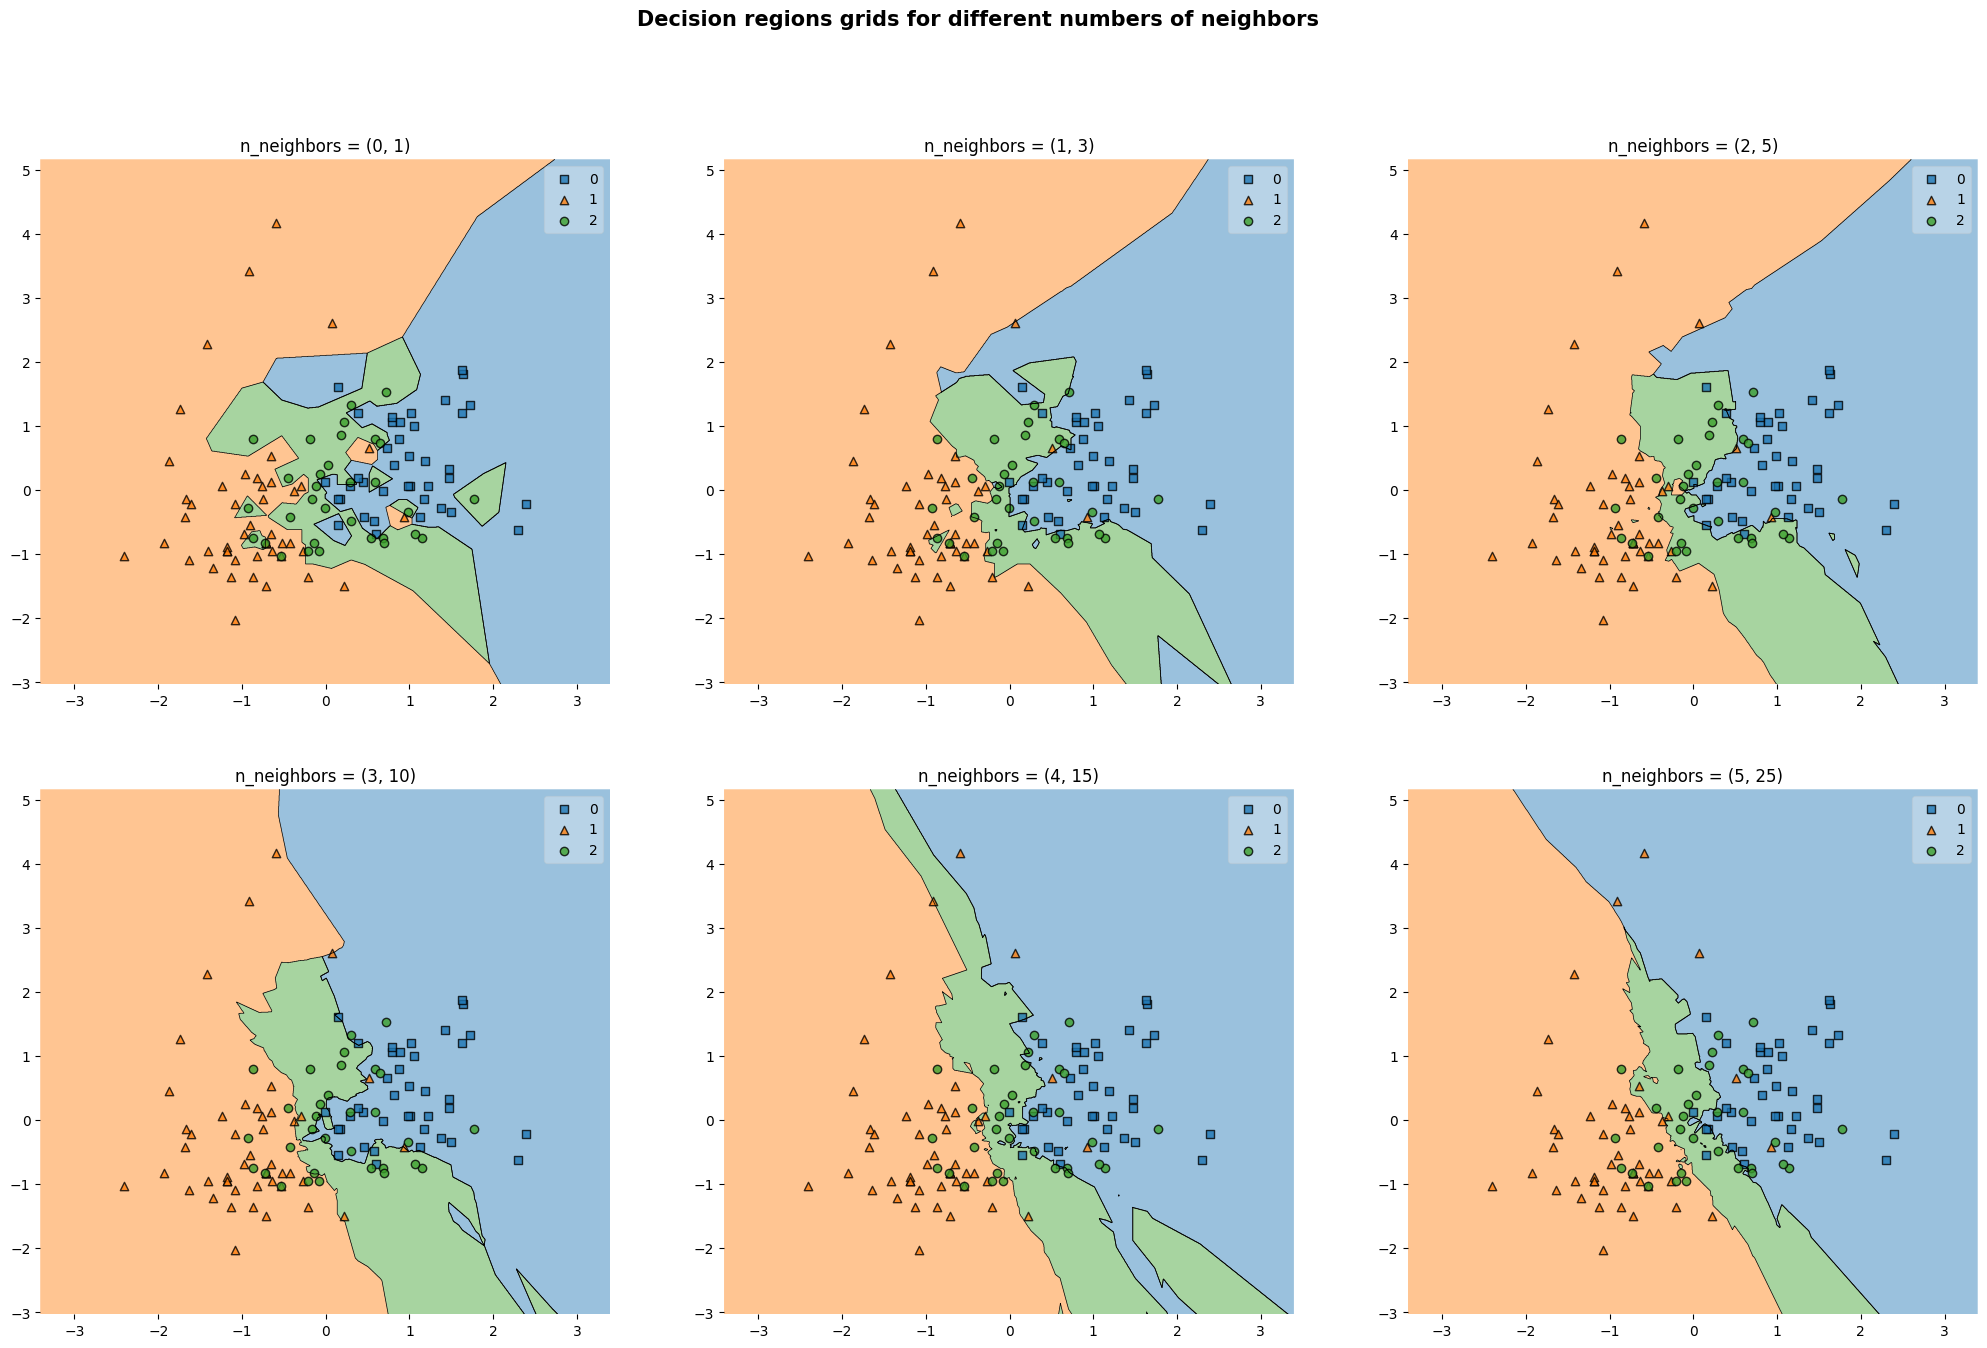

In [291]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(25,15))
plt.suptitle(r"Decision regions grids for different numbers of neighbors", fontsize=15, fontweight='bold')

for clf, n, grd in zip(kNN, enumerate(kNN_n), itertools.product([0, 1], [0, 1, 2])):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X1_scalered_train, y=y_train, clf=clf)
    plt.title('n_neighbors = '+ str(n))

plt.show()


**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о **переобучении** модели? Почему?

**Переобучение** (*overfitting*) — негативное явление, возникающее, когда алгоритм обучения вырабатывает предсказания, которые слишком близко или точно соответствуют конкретному набору данных и поэтому не подходят для применения алгоритма к дополнительным данным или будущим наблюдениям.

**Недообучение** (*underfitting*) — негативное явление, при котором алгоритм обучения не обеспечивает достаточно малой величины средней ошибки на обучающей выборке. Недообучение возникает при использовании недостаточно сложных моделей.

Согласно посчитанной accuracy, модель `kNN1` переобучена, а `kNN6` недообучена. Оптимальное соотношение на `kNN5`.

Чтобы увидеть на картинке переобучение `kNN1`, мы заметим, что все красные треугольники попали в красную область. Это "говорит о том, что мы слишком сильно верим в обучающую выборку и подгоняем под нее". Появляются "как будто бы лишние области, которые бы я сам не стал бы относить к красным". Поэтому появляется большое число изломов. Недообучение `kNN6` можно пронаблюдать так: есть очень много зеленых и красных фигур, около которых стоило бы нарисовать соответствующие цвета.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

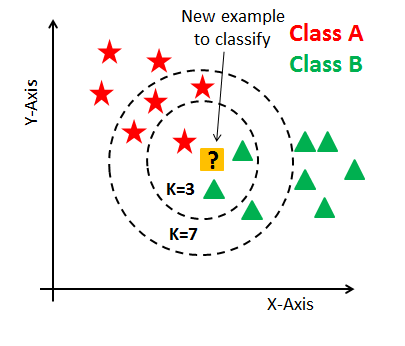

Сначала мы напишем метрику Минковского в $\mathbb{R}^{d}$ с параметром $p\in \mathbb{N}$.

In [165]:
def norm(X,p):
  norm = 0
  for i in range(len(X)):
    norm += X[i]**p
  return norm**(1/p)

тест:

In [166]:
norm([1,1,0], 2)

1.4142135623730951

In [167]:
def metric(X,Y,p):
  return norm(X-Y,p)

Теперь напишем обычный индикатор $I[y^{i}_{u}=y^{i}]$:

In [168]:
def indicator(y_u, y):
  if y_u == y:
    return int(1)
  else:
    return int(0)

тест:

In [169]:
indicator(1,2) + indicator(1,1) + indicator(2,2)

2

Напишем функцию, которая суммирует индикаторы по всему массиву:

In [170]:
def summ_ind(arr, y):
  summ = 0
  for i in range(len(arr)):
    summ += indicator(arr[i],y)
  return summ



---



Реалиация класса `kNN`:

In [171]:
import numpy as np

class KNN:
    def __init__(self, k:int, p:int):
        self.k = k
        self.p = p

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict_for_one(self, x):

      dict_dist = {} # словарь, который каждому расстоянию от x до X_train ставит в соответствие y_train

      top_k_unsorted = [] # список всех расстояний от x до X_train

      for i in range(len(self.X_train)):

          dist = metric(x,self.X_train[i], self.p)

          top_k_unsorted.append(dist)

          dict_dist[dist] = self.y_train[i]

      top_k = np.sort(top_k_unsorted)[:self.k] # сортированный список всех расстояний от x до X_train. Взяли топ k самых маленьких расстояний

      keys_top_k = [] # ключи top_k

      for i in range(self.k):

        keys_top_k.append(dict_dist.get(top_k[i]))

      return self.find_best_y(keys_top_k)

    def predict(self, X):
        y_predict = []
        for x in X:
          y_predict.append(self.predict_for_one(x))
        return np.array(y_predict)

    def find_best_y(self, keys_top_k):
      dict_y = {} # словарь, считающий суммарное вхождения y в массиве keys_top_k
      for y in self.y_train:
        dict_y[y] = summ_ind(keys_top_k,y)
      best_y = max(dict_y, key=dict_y.get)
      return best_y

Тесты:

In [172]:
def test_knn(KNN):
  knn = KNN(k=1, p=2)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1] or knn.predict(X_test) == [0]

  knn = KNN(k=3,p=2)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3,p=2)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3,p=2)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3,p=2)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [173]:
test_knn(KNN)

# Задача линейной регрессии (linear regression)

brief remind:
* задача регрессии $Y=\mathbb{R}$;
* фиксируем параметрическую модель $A=\{g(x,\theta)\}$. Алгоритм $a(x)\in A$;
* $\mathcal{L}(a,x)=(a(x)-y^{*}(x))^{2}$ - *квадратичная функция потерь*;
* $\mathrm{MSE}(a,X^{k}) = Q(a,X^{k})=\frac{1}{k}\sum^{k}_{i=1}(a(x_{i})-y_{i})^{2}$ - *функционал качества*;
* Классический метод обучения $\mu$, называемый *минимизацией эмпирического риска* (*empirical risk minimization, ERM*), заключается в том, чтобы среди всех $a(x)\in A$ найти такой, что на обучающей выборке $X^{k}$ он доставляет минимальное отклонение по заранее выбранному функционалу качества $Q(a,X^{k})$:
$$\mu(X^{k}):=\mathrm{arg}\, \mathrm{min}_{a\in A}Q(a,X^{k}).$$

Пусть теперь $\theta \in \mathbb{R}^{n}$. *Метод Наименьших Квадратов* (МНК) дает конкретный способ как считать $\mu(X^{k})$. То есть действительно является методом обучения.

Пусть каждому объекту $x\in X$ соответсвует ровно $n$ признаков $f_{j}\colon X \to \mathbb{R}$, $j=1,\dots, n$.

Выбираем *модель линейной регрессии* $g(x,\theta) = \sum^{n}_{i=1}\theta_{i}f_{i}(x)$.

Тогда функционал качества пишется так $$Q(g(x,\theta), X^{k}) = \frac{1}{k}\sum^{k}_{i=1}\Big{(}\sum^{n}_{j=1}\theta_{j}f_{j}(x_{i}) - y_{i} \Big{)}^{2}.$$
Нам нужно найти $\theta$ при котором достигается ее наименьшее значение как функции от $\theta\in \mathbb{R}^{n}$.

Метод наименьших квадратов состоит в поиске $\theta$ среди критических точек функции, найти которые можно, по определению, приравняв дифференциал к нулю.

Пусть $F(X)=\big{(}f_{j}(x_{i})\big{)}^{1 \le j\le n}_{1\le i \le k}$ - $(k\times n)$ матрица признаков. Пусть $y=(y_{1},\dots, y_{k})^{t}$ - столбец ответов и $\theta = (\theta_{1},\dots, \theta_{n})^{t}$ - столбец параметров. Тогда

$$Q(g(x,\theta),X^{k}))=Q(\theta) = \frac{1}{k}||F(X) \cdot \theta - y||^{2}.$$

Уберем этот $1/k$. Он никак не влияет на вырожденность дифференциала. Это можно вот так переписать:

$$||F(X) \cdot \theta - y||^{2} = (F(X) \cdot \theta - y)^{t}(F(X) \cdot \theta - y) = (\theta^{t}F^{t}(X)-y^{t})(F(X) \cdot \theta - y)=$$

$$=\theta^{t}F^{t}(X)F(X)\theta - y^{t}F(X)\theta - \theta^{t}F^{t}(X)y+y^{t}y.$$

Если $\theta_{0}$ - фиксированный параметр, а $\theta = \theta_{0}+h$, где $||h||\to 0$, то

$$(\theta_{0}+h)^{t}F^{t}(X)F(X)(\theta_{0}+h)= \theta_{0}^{t}F^{t}(X)F(X)\theta_{0}+ \theta_{0}^{t}F^{t}(X)F(X)h+$$

$$+h^{t}F^{t}(X)F(X)\theta_{0} + h^{t}F^{t}(X)F(X)h.$$

и тогда

$$||F(X)\cdot \theta - y||^2 = ||F(X)\cdot \theta_{0} - y||^2 + y^{t}F(X)h-h^{t}F^{t}(X)y + \theta_{0}^{t}F^{t}(X)F(X)h + h^{t}F^{t}(X)F(X)\theta_{0} +  o(h) = $$

$$=||F(X)\cdot \theta_{0} - y||^2 + 2 \Big{(} \theta_{0}^{t}F^{t}(X)F(X)  - y^{t}F(X) \Big{)} h + o(h) .$$

Приравнивая дифференциал к нулю, получаем систему уравнений $F^{t}(X)F(X)\theta_{0}=F^{t}(X)y$.

Если матрица $F^{t}(X)F(X)$ невырожденная, то имеется единственное решение $\theta_{0}=\big{(}F^{t}(X)F(X)\big{)}^{-1}F^{t}(X)y$. Если же матрица вырожденная, то есть ненулевое ядро $\mathrm{ker}\, F^{t}(X)F(X)$ и тогда либо есть хотя бы одно решение и тогда их бесконечно много (т.к. основное поле $\mathbb{R}$) либо же решений вообще нет. Как видно, это зависит лишь от признаков.

В случае невырожденности мы получаем наименьшее значение функции. Посмотрим на соответствующее наименьшее значение:

$$Q(\theta_{0}) = \frac{1}{k}||F(X)\theta_{0}-y||=\frac{1}{k}||F(X) \big{(}F^{t}(X)F(X) \big{)}^{-1}F^{t}(X)y - y||^2 = \frac{1}{k}||P(X)y - y ||^2 ,$$


где $P(X)$ - матрица ортогонального проектора на подпространство порожденного столбцами матрицы признаков $F(X)$. А это в точности полное признакове описание всех объектов. Итак, мы ортогонально спроецировали ответы $y$ на линейную оболочку признаков $F(X)$, потом померили расстояние между этой проекцией и исходным $y$ - это дает самое маленькое значение функционала качества.

Интересная мысль и хэнбука яндекса:

> Как известно из линейной алгебры, для вещественной матрицы $X$
 ранги матриц $X$
 и $X^{t}X$
 совпадают. Матрица $X^t X$
 невырожденна тогда и только тогда, когда её ранг равен числу её столбцов, что равно числу столбцов матрицы. Иными словами, формула регрессии поломается, только если столбцы матрицы $X$
 линейно зависимы. Столбцы матрицы $X$
 – это признаки. А если наши признаки линейно зависимы, то, наверное, что-то идёт не так и мы должны выкинуть часть из них, чтобы остались только линейно независимые.
Другое дело, что зачастую признаки могут быть приближённо линейно зависимы, особенно если их много. Тогда матрица $X^t X$
 будет близка к вырожденной, и это, как мы дальше увидим, будет вести к разным, в том числе вычислительным проблемам.



Проблема точного решения: если матрица близка к обратимой, то вычислительно у нас появляются проблемы. О них поподробнее:

Пусть $\Sigma(X) := F^{t}(X)F(X)$ - матрица, за которую мы переживаем. Она называется *ковариационной матрицей*. То есть $\Sigma(X)$ - $(k\times k)$ матрица Грама набора вектор-столбцов фичей. Если она близка к необратимой $\iff$ вектор-столбцы фичей $X$ близки к тому чтобы оказаться в линейном пространстве меньшей размерности чем $n$, то говорят, что $\Sigma(X)$ *плохо обусловлена*. Это называют **проблемой мультиколлинеарности**.

*Число обусловленности* $\mu(\Sigma(X)):=\frac{\max_{||u||=1}||\Sigma(X)u||}{\min_{||u||=1}||\Sigma(X)u||} = \frac{\text{максимальное с.ч.}}{\text{минимальное с. ч.}}$. Чем больше число обусловленности тем хуже матрица обусловлена. Заметим, что $\mu(\Sigma^{-1}) = \mu(\Sigma)$.

Пусть $w=\Sigma^{-1}(X)u$.

Если мы измеряем величину $\xi=\xi_{\text{наст}}$, то у нас возникает измеряемое значение $\xi_{\text{изм}}$.
* *Абсолютная погрешность* $\Delta \xi = |\xi_{\text{изм}} - \xi_{\text{наст}}|$;
* *Относительная погрешность* $\delta \xi = \frac{\Delta \xi}{\xi_{\text{наст}}}$.

Посмотрим на относительную погрешность $w$:

$$\delta w = \frac{||\Delta w||}{||w||} = \frac{||w-w_{0}||}{||w||} = \frac{||\Sigma^{-1}u-\Sigma^{-1}u_{0}||}{||\Sigma^{-1}u||} = \frac{||\Sigma^{-1}(u-u_{0})||}{||\Sigma^{-1}u||}\le \frac{\lambda_{\max}(\Sigma^{-1})}{\lambda_{\min}(\Sigma^{-1})}\frac{||u-u_{0}||}{||u||}=\mu(\Sigma^{-1}) \delta u = \mu(\Sigma) \delta u.$$

С другой стороны, $\delta u \le \mu(\Sigma) \delta w$. Тогда

$$\frac{1}{\mu(\Sigma)}\delta u \le \delta w \le \mu(\Sigma) \delta u.$$


Таким образом, если $\Sigma$ хорошо обусловлена, то беря близкие $y$, мы получаем близкие значения на обратной матрице $\Sigma^{-1}$. Но если плохо обусловлена, то оценка ничего не говорит. Чтобы точно подтвердить, что при плохой обусловленности мы получаем большую ошибку, можно воспользоваться **SVD разложением**.

> Каждая вещественная прямоугольная матрица $F\in \mathrm{Mat}_{m\times n}(\mathbb{R})$ раскладывается в произведение $F=T_{m}DT_{n}$, в котором матрицы $T_{m}\in O(m)$, $T_{n}\in O(n)$ ортогональны, а $m\times n$-матрица $D=(d_{ij})$ диагональна и неотрицательна в том смысле, что $d_{ij} = 0$ при $i\ne j$ и все $d_{ii}\ge 0$. При этом ровно $\mathrm{rk}\, F$ элементов диагонали матрицы $D$ отличны от нуля, и они с точностью до перестановки
диагональных элементов не зависят от выбора указанного разложения.



Разложим $F=T_{m}DT_{n}$. Тогда $F^{t}=T^{t}_{n}D^{t}T^{t}_{m}$. Получаем $$F^{t}F =T^{t}_{n}D^{t}T^{t}_{m} T_{m}DT_{n} = T^{t}_{n}D^{t}DT_{n}.$$

Значит,

$$\theta_{0}=\big{(}F^{t}(X)F(X)\big{)}^{-1}F^{t}(X)y = T^{-1}_{n}\big{(}D^{t}D \big{)}^{-1}(T^{t}_{n})^{-1}T^{t}_{n}D^{t}T^{t}_{m} = T^{t}_{n}\big{(}D^{t}D \big{)}^{-1}D^{t}T^{t}_{m}.$$

Найти $\big{(}D^{t}D \big{)}^{-1}D^{t}$ можно без обращений поскольку $D$ - диагональная.

Воронцов:




> Итак, если есть сингулярное разложение, то обращать матрицы уже не нужно.
Однако вычисление сингулярного разложения практически столь же трудоёмко, как
и обращение. Эффективные численные алгоритмы, вычисляющие SVD, реализованы
во многих стандартных математических пакетах



Записав формулу для $\theta_{0}$ явно можно увидеть деление на корни к сингулярным числам, и квадрат нормы оптимального параметра $||\theta_{0}||^2$ будет содержать деления на сингулярные числа, что увеличивает погрешность. Поэтому применять точное решение не всегда хорошая идея.

## Борьба с мультиколлинеарностью

### Ridge-регрессия = легуризация второй метрики

Меняем функционал качества так, чтобы он учитывал большие значения $||\theta||_{2}^2$ - т.е. штрафовал за них:

$$Q(\theta) := ||F\theta - y||^2 + \alpha ||\theta||_{2}^2.$$

Здесь $\alpha \ge 0 $ - гиперпараметр регулирезации. С его подбором тоже есть какая-то заморочка (попозже): хэндбук



> Коэффициент $\alpha$
 является гиперпараметром модели и достаточно сильно влияет на качество итогового решения. Его подбирают по логарифмической шкале (скажем, от `1e-2` до `1e+2`), используя для сравнения моделей с разными значениями $\alpha$
 дополнительную валидационную выборку. При этом качество модели с подобранным коэффициентом регуляризации уже проверяют на тестовой выборке, чтобы исключить переобучение.



Повторив мои вычисления выше для этого функционала мы получим такое точное решение $\theta_{0}(\alpha)$:

$$\theta_{0}(\alpha) = \big{(}F^{t}(X)F(X)+\alpha E \big{)}^{-1}F^{t}(X)y.$$

Воронцов:



> Таким образом, перед обращением матрицы к ней добавляется «гребень» — диагональная матрица $\alpha E$. Отсюда и название метода — *гребневая регрессия (ridge
regression)*. При этом все её собственные значения увеличиваются на $\alpha$ , а собственные
векторы не изменяются. В результате матрица становится хорошо обусловленной,
оставаясь в то же время «похожей» на исходную.



### Lasso-регрессия = легуризация первой метрики

Вместо второй метрики ставим первую:

$$Q(\theta):=||F\theta - y||^{2}_{2} + \alpha||\theta||_{1}.$$

Возникает проблема: $||\theta||_{1}$ не дифференцируема в нуле! Как искать оптимальный параметр $\theta$? ⛪

Будем смотреть на линии уровней функционалов ошибок лассо и ридж регрессий: возьму картинку из хэндбука яндекса (надеюсь никто не обидется): здесь $\theta= w=(w_{1},w_{2})\in \mathbb{R}^{2}$.

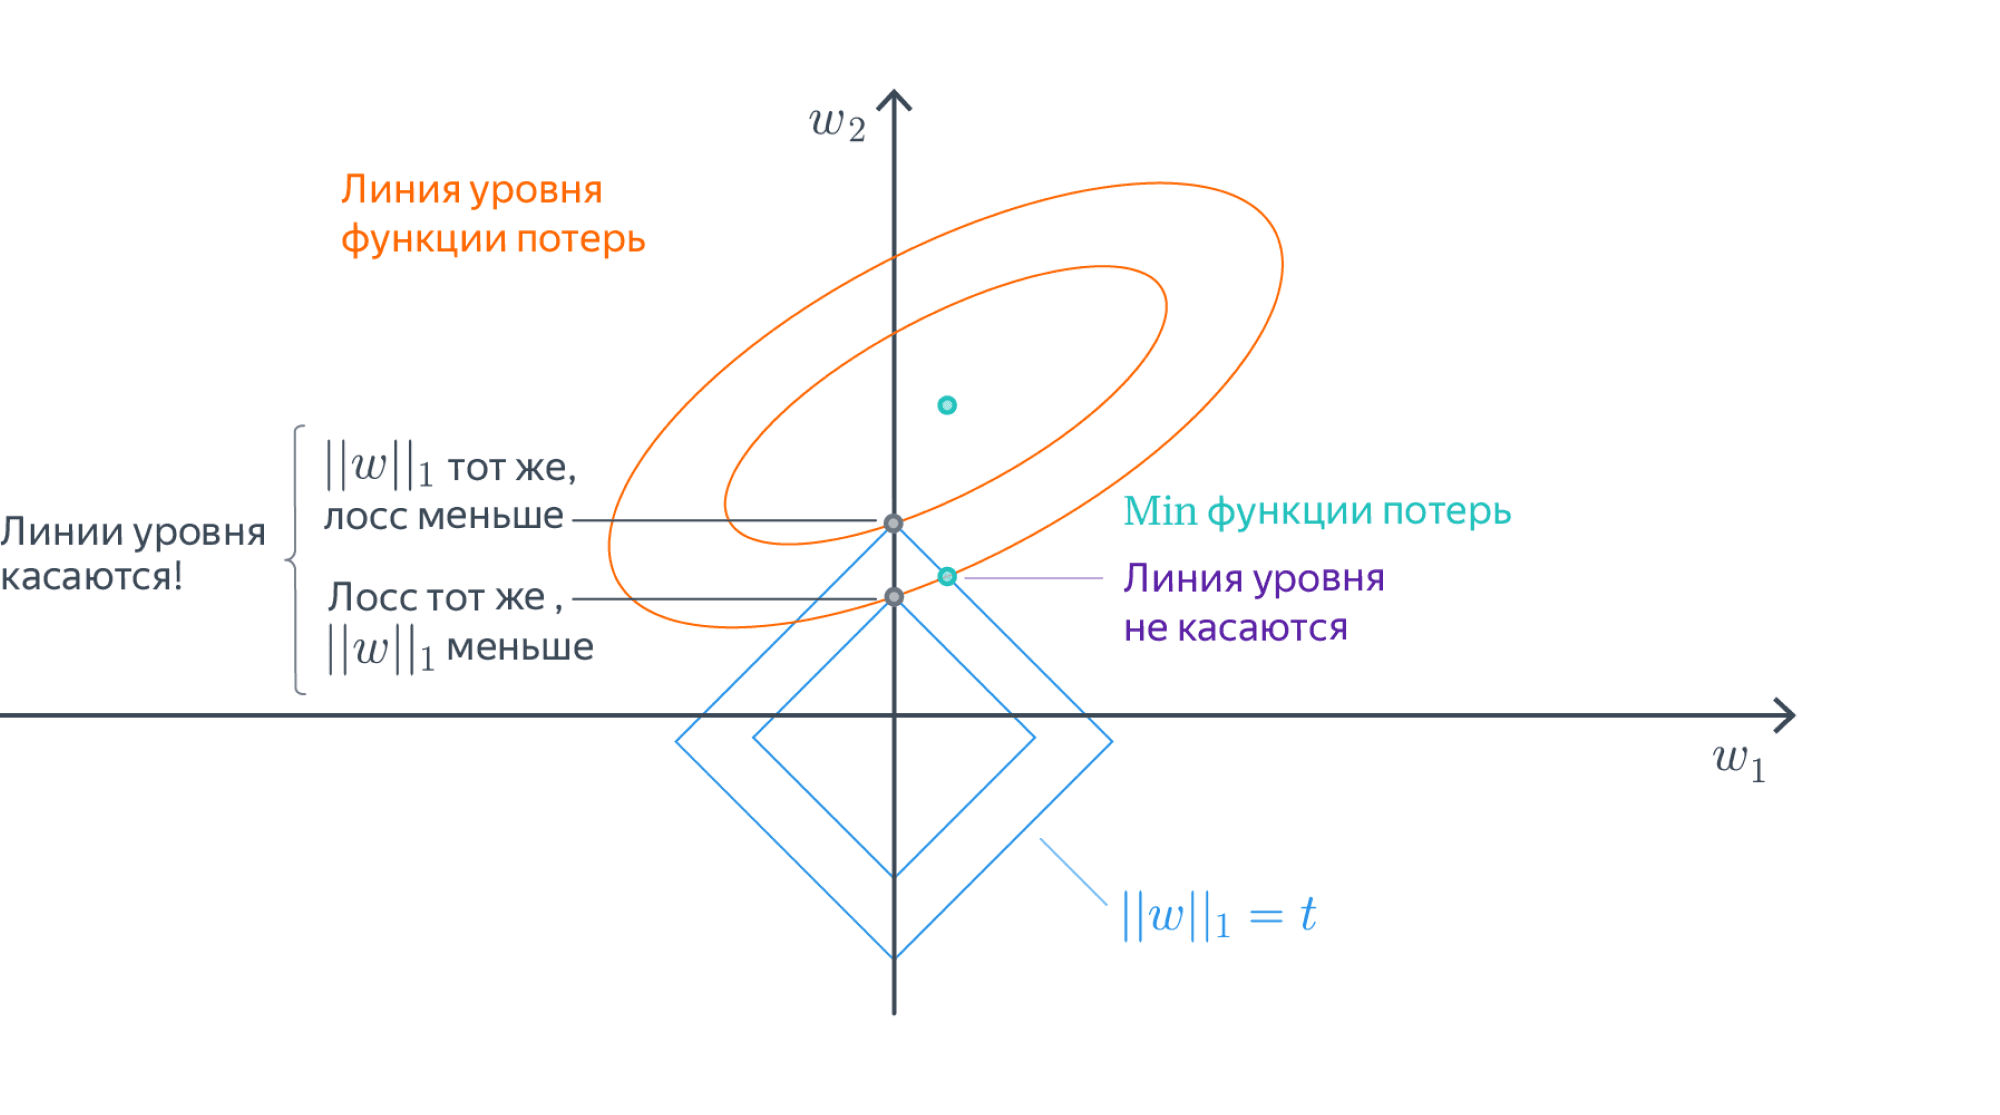

**Замечание**: ромбик неправильно нарисован, потому что горизонатальные вершины должны попадать на ось $w_{1}$.

Что тут происходит: концетрицеские эллипсы - линии уровня MSE, а концетрические ромбики - линии уровня нормы L1. Нам нужно найти такой $w\in \mathbb{R}^{2}$, чтобы суммарная потеря была наименьшей.

Если зафиксировать, что мы хотим $||w||_{1}=t$, то мы катаемся по ромбику и ясно, что нам нужно отправиться в вершину этого ромбика, где линии уровня касаются. Действительно, если пересекаются трансверсально, то можно проехать по линии уровня MSE и найти более оптимальную точку.

Таким образом, мы выяснили, что нужно *занулять часть координат* (так выглядят вершины ромбиков в $\mathbb{R}^{d}$). Вот иллюстрация (тоже из хэндбука):

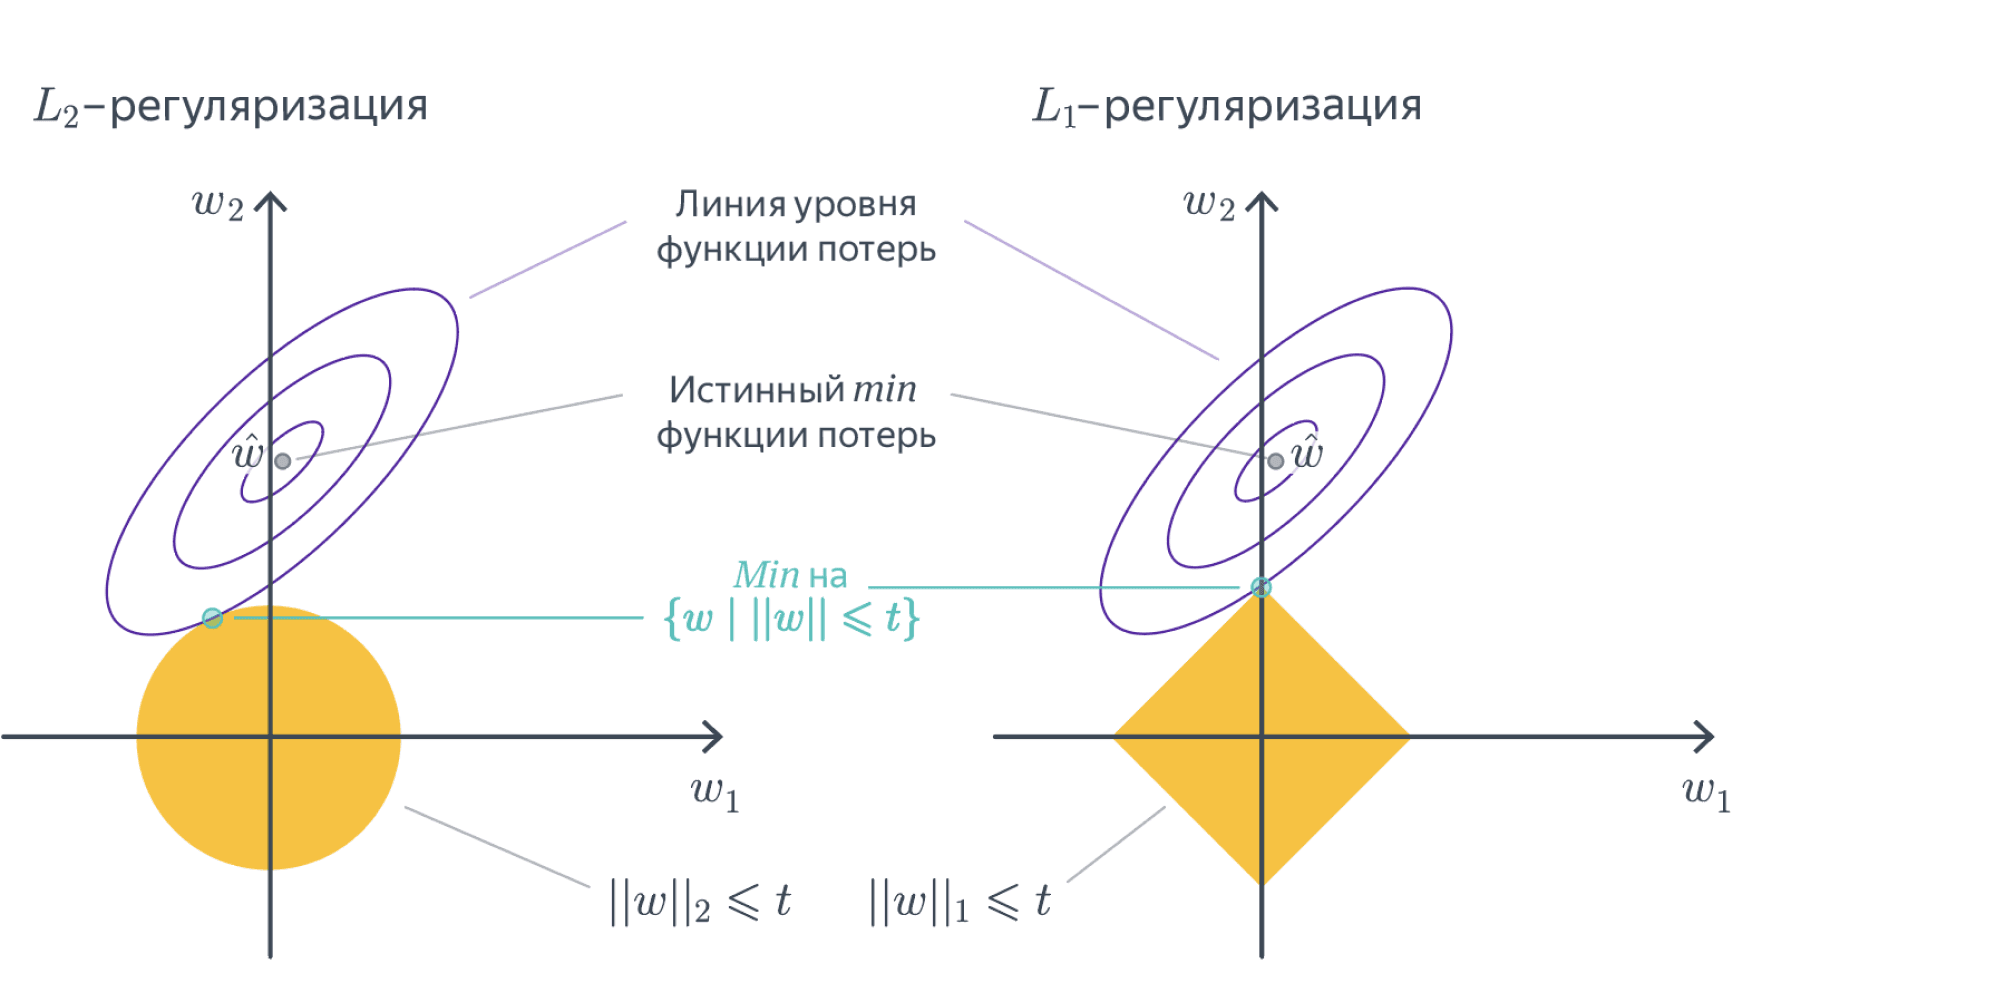

Ссылка из хэндбука:



> Заметим, что данное построение говорит о том, как выглядит оптимальное решение задачи, но ничего не говорит о способе, которым это решение можно найти. На самом деле, найти такой оптимум непросто: у $L_{1}$
 меры довольно плохая производная. Однако, способы есть. Можете на досуге прочитать, например, вот эту статью о том, как работало предсказание CTR в google в 2012 году. Там этой теме посвящается довольно много места. Кроме того, рекомендуем посмотреть про проксимальные методы в разделе этой книги про оптимизацию в ML.



In [174]:
#https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/41159.pdf

# Задачи по линейной регресии

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [175]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [176]:
data.size

593340

In [177]:
data.shape

(53940, 11)

Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Заметим, что нулевой столбец является просто индексом. Поэтому мы удалим его.

In [179]:
del data['Unnamed: 0']

In [180]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [181]:
X_real_features = data[['carat', 'depth', 'table', 'x', 'y', 'z']]

In [182]:
y_price_target = data[['price']]

In [183]:
Z_features_targets = data[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']]

In [184]:
X_real_features

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,5.66,5.68,3.56
53938,0.86,61.0,58.0,6.15,6.12,3.74


In [185]:
y_price_target

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757




---



Пусть $X$ и $Y$ - случайные величины. Напомним, что такое *ковариация*: $$\mathrm{cov}(X,Y)=E\big{(}(X-E(X))(Y-E(Y)) \big{)}.$$ Она измеряет насколько $X$ и $Y$ зависимы. Так же про ковариацию можно думать как о скалярном произведении случайных величин $X-E(X)$ и $Y-E(Y)$.

*Коэффициент кореляции Пирсона* $\rho(X,Y)=\frac{\mathrm{cov}(X,Y)}{\sqrt{D(X)}\sqrt{D(Y)}}$. Его можно понимать как косинус угла скалярного произведения $\mathrm{cov}(X,Y)$.

Пусть $X$ и $Y$ линейно зависимы и имеют нулевые средние. То есть $Y= X \theta$. Тогда $\mathrm{cov}(X,Y)=E(XY)=\theta E(X^{2})=\theta D(X)$ и  

$$\rho(X,Y)=\frac{\theta}{|\theta|} \cdot \frac{D(X)}{|D(X)|}=\mathrm{sign}\big{(}D(X)\big{)} \mathrm{sign}(\theta).$$

Если модуль кореляции "близок" к $1$, то зависимость "близка" к линейной.

Увеличим размерность. Рассмотрим в общем $F(X)\theta = y$, то есть

$$f_{1}(x_{i})\theta_{1}+\dots+ f_{n}(x_{i})\theta_{n} = y_{i},\quad i=1,\dots, k.$$

Напомним, что $i$ - номер объекта выборки.

Другими словами, мы думаем про $X_{1}\theta_{1}+\dots + X_{n}\theta_{n}=Y$, где $X_{j},Y$ - случайные величины.

Предположим, что у нас есть такая линейная зависимость и все $X_{j},Y$ имеют нулевые средние. Тогда

$$\rho(X_{j}, Y) = \frac{E(X_{j}Y)}{\sqrt{D(X_{j})}\sqrt{D(Y)}} = \frac{\sum^{n}_{s=1}\theta_{s}E(X_{j}X_{s})}{\sqrt{D(X_{j})\sqrt{D(\sum^{n}_{s=1}X_{s}\theta_{s})}}}.$$

Если $X_{\alpha}$ и $X_{\beta}$ независимы при $\alpha \ne \beta$, то

$$\rho(X_{j},Y)=\frac{\theta_{j}D(X_{j})}{|\theta_{j}||D(X_{j})|}.$$

Таким образом, если величины $X_{j}$ попарно независимы, то можно посчитать кореляцию для каждой пары $(X_{j},Y)$



---



In [186]:
correlation_matrix = Z_features_targets.corr()

In [187]:
import seaborn as sns

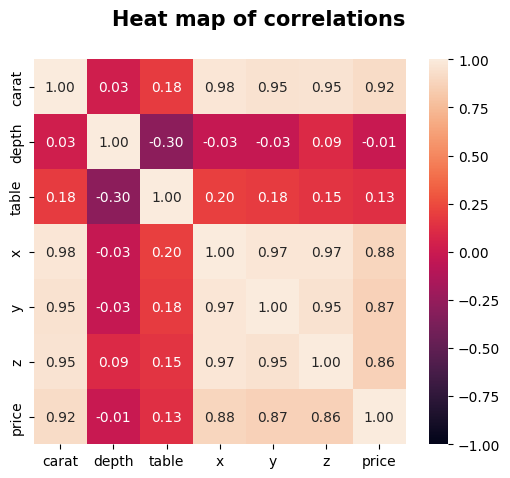

In [188]:
plt.figure(figsize=(6, 5))
plt.suptitle(r"Heat map of correlations", fontsize=15, fontweight='bold')
ax = sns.heatmap(correlation_matrix, vmin=-1, vmax=1,  annot=True, fmt="0.2f") #строим тепловую карту корреляций
plt.show()

In [189]:
correlation_matrix

,carat,depth,table,x,y,z,price
carat,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387,0.921591
depth,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924,-0.010647
table,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929,0.127134
x,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772,0.884435
y,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006,0.865421
z,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000,0.861249
price,0.921591,-0.010647,0.127134,0.884435,0.865421,0.861249,1.000000


Мысли следующие: `price` "приблизительно независим" с `depth` и `table`, поэтому я бы не стал использовать эти признаки для обучения линейной регрессии. Еще видно, что `x,y,z` "приблизительно линейно зависимы" с `carat`. Поэтому из всех признаков я бы оставил только `carat`.

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [190]:
cat_features = data[['cut',	'color',	'clarity']]

In [191]:
encoded_features = encoder.fit_transform(cat_features).toarray()

In [192]:
encoded_df_features = pd.DataFrame(encoded_features)

In [193]:
encoded_df_features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [194]:
df = pd.concat([X_real_features, encoded_df_features], axis= 1)

In [195]:
df

,carat,depth,table,x,y,z,0,1,2,3,...,10,11,12,13,14,15,16,17,18,19
0,0.23,61.5,55.0,3.95,3.98,2.43,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,3.89,3.84,2.31,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,4.05,4.07,2.31,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,4.20,4.23,2.63,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,4.34,4.35,2.75,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,0.72,63.1,55.0,5.69,5.75,3.61,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.70,62.8,60.0,5.66,5.68,3.56,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.86,61.0,58.0,6.15,6.12,3.74,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [196]:
X_train, X_test, y_train, y_test = train_test_split(df, y_price_target, test_size=0.3, random_state=np.random.seed())

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [197]:
X_train_float = X_train[['carat',	'depth',	'table',	'x',	'y',	'z']]
X_test_float = X_test[['carat',	'depth',	'table',	'x',	'y',	'z']]
X_train_cat = X_train[range(20)]
X_test_cat = X_test[range(20)]

In [198]:
scaler.fit(X_train_float)

StandardScaler()

In [199]:
X_train_float_sc = scaler.transform(X_train_float)

In [200]:
X_test_float_sc = scaler.transform(X_test_float)

Теперь все соединяем:

In [201]:
X_train_sc = np.concatenate((X_train_float_sc, X_train_cat), axis= 1)
X_test_sc = np.concatenate((X_test_float_sc, X_test_cat), axis= 1)

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [202]:
from sklearn.linear_model import LinearRegression as LR

Обычная линейная регрессия методом наименьших квадратов.

Линейная регрессия соответствует линейной модели с коэффициентами $w = (w_{1}, \dots, w_{p})$, чтобы минимизировать остаточную сумму квадратов между наблюдаемыми таргетами в выборке и таргетами, предсказанными с помощью линейной аппроксимации.

То есть функция потерь `MSE`.

Краткий обзор класса `LinearRegression`. При инициализации объекта передаются параметры:
* **fit_interceptbool, default=True**: Следует ли вычислять перехват для этой модели? Если установлено значение `False`, перехват не будет использоваться в расчетах (т.е. ожидается, что данные будут центрированы);
* **copy_Xbool, default=True**: Если значение равно `True`, то `X` будет скопирован; в противном случае он может быть перезаписан;
* **n_jobsint, default=None**: Количество заданий, используемых для вычисления. Это обеспечит ускорение только в случае достаточно больших задач, то есть, если, во-первых, `n_targets > 1`, а во-вторых, `X` является разреженным или если значение `positive` равно `True`. По умолчанию `None` означает 1;
* **positivebool, default=False**: Если установлено значение `True`, коэффициенты должны быть положительными. Эта опция поддерживается только для плотных массивов.

Самый главный метод - метод `fit(X,y,sample_weight=None)`. Можно передать веса.

In [203]:
LR = LR().fit(X_train_sc, y_train)

Появляются новые методы и атрибуты. О них постепенно.

* `score(X, y, sample_weight=None)` - дает *коэффициент детерминации* $R^2$. Он определяется так:

$$R^2 = \Big{(}1-\frac{u}{v} \Big{)},$$

где $u$ = `((y_true - y_pred)** 2).sum()` и $v$ = `((y_true - y_true.mean()) ** 2).sum()`. Максимальное значение = 1. Чем выше, тем лучше.

In [204]:
LR.score(X_train_sc, y_train)

0.9218487050423061

Теперь мы импортируем `MSE`:

In [205]:
from sklearn.metrics import mean_squared_error as MSE

* Метод `predict(X)` дает вектор предсказательных таргетов по выборке `X`.

In [206]:
y_pred_test = LR.predict(X_test_sc)

In [207]:
y_pred_train = LR.predict(X_train_sc)

Мерим ошибки:

In [208]:
MSE(y_pred_train ,y_train)

1239071.4907141912

In [209]:
MSE(y_pred_test, y_test)

1366462.082297609

**Вывод**: ошибки примерно совпадают. Значит, мы неплохо обучили модель.

**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [210]:
w =np.array(LR.coef_[0])

In [211]:
values = df.columns.values.tolist()

In [212]:
dict = {} # словарь: модуль коэффициента -> название фичи

for i in range(len(w)):
  w[i] = np.abs(w[i])
  dict[w[i]] = values[i]

In [213]:
w = np.sort(w)

In [214]:
for i in range(len(w)):
  print(w[i], dict[w[i]])

7.210567706144123 y
12.418867304425566 1
26.1475662797626 z
65.81319702641002 table
98.69737049464493 depth
129.6874192039854 14
143.97564313132682 4
157.1222679248667 9
174.23874172635558 3
243.58904703875015 2
358.62473188477566 8
462.54475304663305 17
549.3845645920101 0
563.2705689686051 7
628.2286237160808 10
629.2525008969475 6
783.434330601926 16
826.5424687688388 5
1112.4962878610322 15
1145.062768564129 19
1175.5679542821858 18
1217.7460149425 x
1486.9678360699065 13
1592.3393788782182 11
3811.3939354997597 12
5412.793515212078 carat


По модулю сравнительно больше вес перед `carat`.

**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.



---



In [215]:
from sklearn.linear_model import Ridge

In [216]:
Rg = Ridge(alpha = 10) # инициализация

In [217]:
Rg.fit(X_train_sc, y_train) # обучаем

Ridge(alpha=10)

In [218]:
y_pred_test = Rg.predict(X_test_sc)

In [219]:
y_pred_train = Rg.predict(X_train_sc)

Ошибки:

In [220]:
MSE(y_pred_train ,y_train)

1239243.646233521

In [221]:
MSE(y_pred_test ,y_test)

1365580.5128413737

In [222]:
w =np.array(Rg.coef_[0])

dict = {} # словарь: модуль коэффициента -> название фичи

for i in range(len(w)):
  w[i] = np.abs(w[i])
  dict[w[i]] = values[i]

w = np.sort(w)

for i in range(len(w)):
  print(w[i], dict[w[i]])

4.418331239832401 y
12.259849827646285 1
29.935340886869163 z
66.18062179661072 table
97.03586385517556 depth
138.30189947163004 14
145.75124487542467 4
157.52147938133643 9
174.76179821204386 3
244.65977490020208 2
356.8867154807518 8
453.64277203561045 17
552.9129681606894 0
559.3602279537612 7
625.0376825070877 10
625.4040859137557 6
772.9212513600977 16
821.5559075625682 5
1116.864136820361 15
1134.0267541855058 19
1163.4504242900443 18
1172.7863716247662 x
1467.0766674589556 13
1580.6477750209283 11
3735.9518330378073 12
5370.645622301831 carat


Ридж регрессия не дает практически никаких изменений в сравнении с обычной.



---



In [223]:
from sklearn.linear_model import Lasso

In [224]:
La = Lasso(alpha = 10) # инициализация

In [225]:
La.fit(X_train_sc, y_train) # обучаем

Lasso(alpha=10)

In [226]:
y_pred_test = La.predict(X_test_sc)

In [227]:
y_pred_train = La.predict(X_train_sc)

Ошибки:

In [228]:
MSE(y_pred_train ,y_train)

1277054.6568209478

In [229]:
MSE(y_pred_test ,y_test)

1397281.6022950525

In [230]:
w =np.array(La.coef_)

dict = {} # словарь: модуль коэффициента -> название фичи

for i in range(len(w)):
  w[i] = np.abs(w[i])
  dict[w[i]] = values[i]

w = np.sort(w)

for i in range(len(w)):
  print(w[i], dict[w[i]])

0.0 8
0.0 8
0.0 8
0.0 8
19.816535940916133 17
23.307294640457197 z
42.30109820658184 1
80.12082916791424 2
85.55711062664645 table
104.50068852875968 7
107.38241402212913 depth
160.9907774683484 6
162.44154313060528 16
316.6647321313155 5
405.48700938547483 0
455.88323041587 9
488.39984718226486 18
509.77462872942647 19
622.4300390757895 14
623.0280776656675 13
790.6313177607166 x
860.0282642608898 10
1545.3907223707556 15
1706.0397827395184 11
3543.740917253556 12
4916.0107773478 carat


Видим, что `carat` уменьшился на 10%. Остальные параметры стали "более равномерно распределены".

**Задача 3.9 (0.4 балла)** Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [ ]:
alpha = [0.1, 1, 10, 100, 200]

ridge_norms = []
lasso_norms = []

for i in alpha:
  ridge = Ridge(alpha = i)
  ridge.fit(X_train_sc, y_train)
  ridge_norm = np.linalg.norm(ridge.coef_)
  ridge_norms.append(ridge_norm)

  lasso = Lasso(alpha = i)
  lasso.fit(X_train_sc, y_train)
  lasso_norm = np.linalg.norm(lasso.coef_)
  lasso_norms.append(lasso_norm)

In [232]:
ridge_norms, lasso_norms

([7562.278078040314,
  7554.302889391904,
  7476.011287026418,
  6814.527799362723,
  6264.231334706077],
 [7723.0304936163275,
  7679.936077062419,
  6725.068566063083,
  3677.9524438327608,
  3473.6664807456555])

Лассо агрессивнее уменьшает веса.

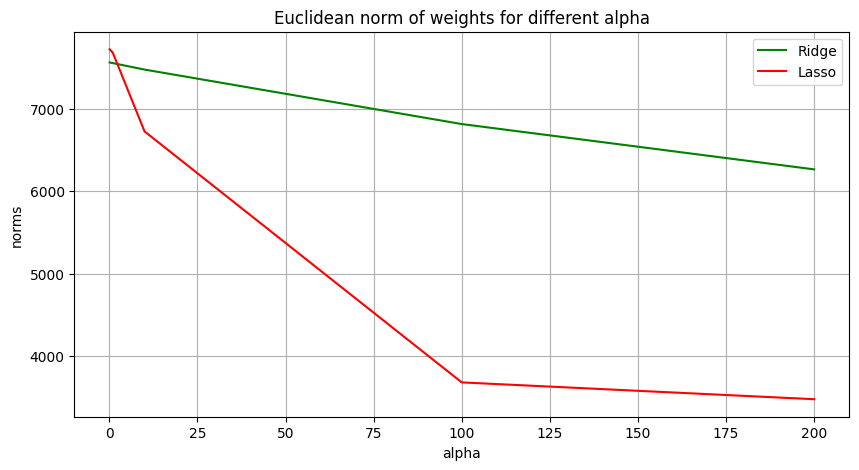

In [233]:
plt.figure(figsize=(10, 5))
plt.title("Euclidean norm of weights for different alpha")

plt.plot(alpha, ridge_norms , label='Ridge', color='green')
plt.plot(alpha, lasso_norms, label='Lasso', color ='red') #,  marker='o'

plt.xlabel('alpha') #Подпись для оси х
plt.ylabel('norms') #Подпись для оси y

plt.grid(True)
plt.legend()

plt.show()

Лассо сильнее уменьшает веса чем Ридж.

**Вопрос**: *как уменьшение весов поможет отобрать нужные признаки?*



---



### Кросс-валидация

Хэндбук:



>Кросс-валидация — это процедура для **оценки качества работы модели**, которая широко применяется в машинном обучении. Она помогает сравнить между собой различные модели и выбрать наилучшую для конкретной задачи.



Вот основные процедуры кросс валидации:
* **Hold-out**: мы этим постоянно пользовались. Разбить выборку на обучающую и тестовую. В тестовую не подглядывать. После обучения на обучающей выборке сравнить ошибки на тесте и обучении. Если ошибки близки, то обучились неплохо. Еще есть всякие практические рекомендации по типу: мешайте данные и заведите *валидационное множество* - маленький кусочек выборки. Валидационное множество используют так: нужно подобрать оптимальные гиперпараметры модели $\to$ обучаем много моделей с разными гиперпараметрами на валидационном множестве $\to$ сравниваем их на тестовой выборке $\to$ выбираем гиперпараметр на котором все круче. Когда данных мало или еще по каким-то другим причинам обучают на всей выборке, а сравнивают по так называемым *кривым обучения*, которые показывают как модель будет вести себя на новых данных.
* **k-Fold**: самое популярное. Он является обобщением метода `hold-out` и представляет из себя следующий алгоритм: (хэндбук)


 1. Фиксируется некоторое целое число $k$
 (обычно от 5 до 10), меньшее числа семплов в датасете.
 2. Датасет разбивается на $k$ одинаковых частей (в последней части может быть меньше семплов, чем в остальных). Эти части называются *фолдами*.
 3. Далее происходит $k$ итераций, во время каждой из которых один фолд выступает в роли тестового множества, а объединение остальных — в роли тренировочного. Модель учится на $k-1$
 фолде и тестируется на оставшемся.
 4. Финальный скор модели получается либо усреднением $k$
 получившихся тестовых результатов, либо измеряется на отложенном тестовом множестве, не участвовавшем в кросс-валидации.








Интересный вопрос о том как использовать эти $k$ фолдов, **если уже выбраны гиперпараметры**:

* Брать $k$-обученных моделей и брать алгоритм, который усредняет их предсказания;
* Сравнить скоры на каждом и выбрать алгоритм с наилучшим.



---



Теперь посмотрим на способ подбора оптимального гиперпараметра $\alpha$ для Лассо регрессии.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [234]:
from sklearn.linear_model import LassoCV # импортируем кросс-валидацию для Лассо регрессии

In [ ]:
cross_valid = LassoCV(cv=5, alphas=alpha, random_state=66).fit(X_train_sc, y_train)

In [236]:
print('alpha', *cross_valid.alphas_, sep='\t\t') #альфы
print('MSE', *cross_valid.mse_path_.mean(axis=1), sep=' ') #усредненные ошибки MSE

alpha		200.0		100.0		10.0		1.0		0.1
MSE 2399191.713825165 2184828.8038254823 1281043.8484794938 1245958.3466906098 1247064.3996793348


Итак, значит нам нужен гиперпараметр $\alpha = 1$.

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [238]:
lasso = Lasso(alpha = 1)
lasso.fit(X_train_sc, y_train)

Lasso(alpha=1)

In [243]:
w =np.array(lasso.coef_)

dict = {} # словарь: коэффициент -> название фичи

for i in range(len(w)):
  w[i] = np.abs(w[i])
  dict[w[i]] = values[i]

w = np.sort(w)

for i in range(len(w)):
  if w[i] != 0:
    print(w[i], dict[w[i]])

23.74068588602713 3
25.199825094517294 z
67.69778264764237 table
84.9889275983665 17
96.04202721000736 2
99.81096560213466 depth
146.6793551300552 1
194.93086946619346 7
222.0598484440415 16
259.9869916574029 6
453.1980493997152 5
509.4394918673133 9
582.1211785102574 19
607.5197005772392 18
666.499517956078 0
678.3444088467775 14
901.3095350436572 13
973.9401451875511 10
1169.4496882592755 x
1655.0891207864836 15
1926.2830549330106 11
4283.976327313966 12
5363.273710916629 carat


Веса перед `y`, `4`, `8` стали равны нулю. Коэффициент перед `carat` все еще наиболее весомый. Веса до `depth` не особо информативны.

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [245]:
MSE(lasso.predict(X_test_sc),y_pred_test)

33437.7305682448

In [246]:
MSE(LR.predict(X_test_sc),y_pred_test)

41291.521057747595

**Вывод**: стоит использовать Лассо регрессию.

**Причина**: и лассо и линейная регрессия обучаются по одному и тому же методу - методу минимизацией эмперического риска. Но у них разные функционалы потерь. Для обычной линейной регрессии есть точное решение, но там обращение матрицы. А у нас есть почти линейно зависимые признаки, что может дать большую погрешность в ее обращении. Поэтому мы и сделали регулеризацию: решение стало содержать меньше погрешности, хоть может и отдалилось от оптимального в смысле MSE.